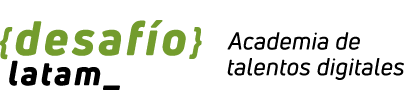

<center><h1> <font color='green'>Clustering con KMeans</font></h1></center>


## Importación de bibliotecas y lectura de datos

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances

wine = load_wine()
data = pd.DataFrame(wine.data)
X = data.iloc[:, 0:3]

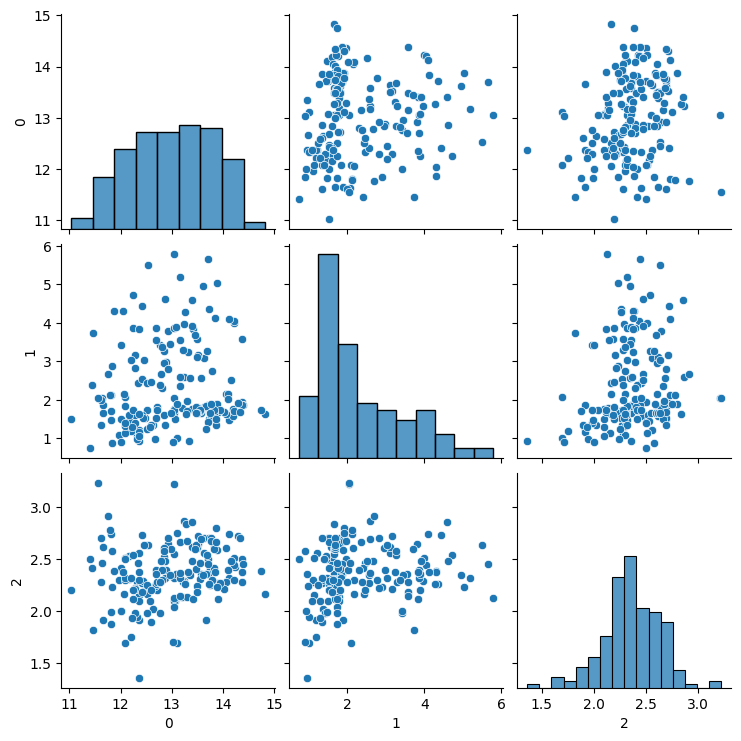

In [5]:
#Veremos la relación entre las variables
sns.pairplot(X)

In [7]:
# Definir una lista de posibles valores de k para el método del codo
k_values = range(2, 8)

# Inicializar listas para almacenar las métricas
inertia_values = []
# Realizar clustering con diferentes valores de k y calcular las métricas
for k in k_values:
    kmeans = KMeans(n_clusters=k, init = {'k-means++'}) #random_state=42
    kmeans.fit(X)
    labels = kmeans.labels_
    # Calcular la inercia
    inertia_values.append(kmeans.inertia_)

# Graficar el método del codo utilizando la inercia
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


TypeError: float() argument must be a string or a real number, not 'set'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-74-e4c9d9a99fb1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clusters'] = labels


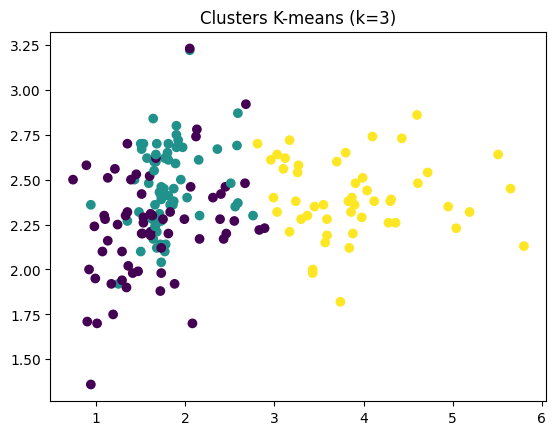

In [ ]:
# Realizar clustering con el valor óptimo de k (elegido por el método del codo)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
X['clusters'] = labels


# Graficar los clusters en el espacio reducido por PCA
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=labels)
#plt.xlabel('Componente Principal 1')
#plt.ylabel('Componente Principal 2')
plt.title('Clusters K-means (k=3)')
plt.show()


In [ ]:
# Calcular la puntuación de silueta
silhouette_scores = silhouette_score(X, labels)
# Calcular el índice de Dunn
dunn_index = davies_bouldin_score(X, labels)
print(f'Silhoutte Score : {silhouette_scores}')
print(f'Davies Bouldin Score : {dunn_index}')

Silhoutter Score : 0.5401522560272012
Davies Bouldin Score : 0.6386372870009652


In [ ]:
#fuzzy
!pip install scikit-fuzzy #podría ser necesario
import skfuzzy as fuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=135ca403805ab9f48d768a49c24cf1dd79d72597c989403faf8169d5e8f76597
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Definir una lista de posibles valores de m
m_values = np.arange(1.1, 3.1, 0.1)

# Inicializar listas para almacenar las métricas
silhouette_scores_fuzzy = []
davies_bouldin_scores_fuzzy = []

# Realizar clustering fuzzy con diferentes valores de m y calcular las métricas

for m in m_values:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, 3, m, error=0.005, maxiter=1000)
    labels = np.argmax(u, axis=0)

    # Calcular la puntuación de silueta
    silhouette_scores_fuzzy.append(silhouette_score(X, labels))

    # Calcular el índice de Dunn
    dunn_index = davies_bouldin_score(X, labels)
    davies_bouldin_scores_fuzzy.append(dunn_index)

# Encontrar el valor óptimo de m basado en la puntuación de silueta
optimal_index = np.argmax(silhouette_scores_fuzzy)
optimal_m = m_values[optimal_index]

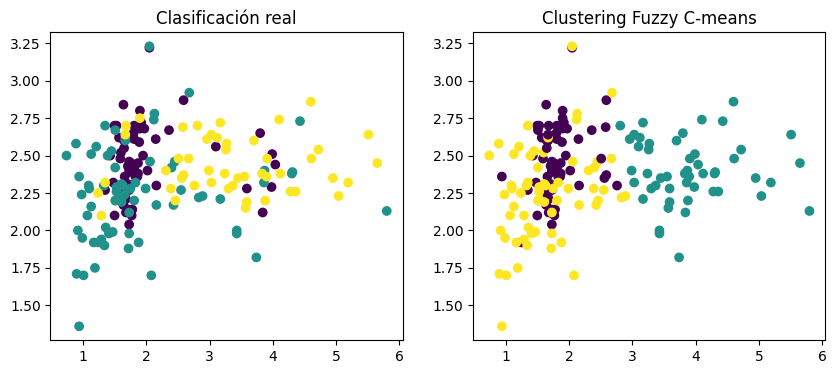

Valor óptimo de m: 1.1


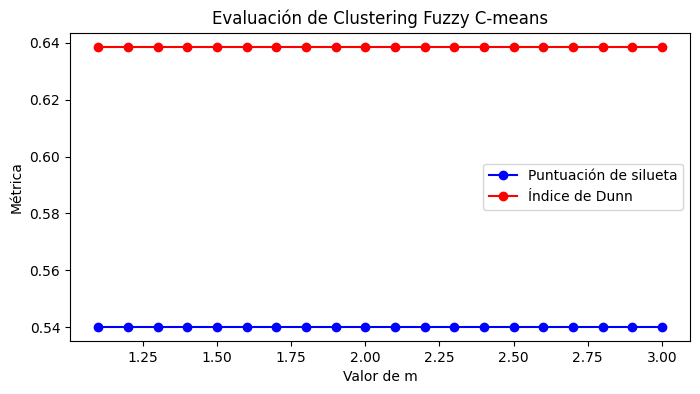

In [ ]:
# Realizar clustering con el valor óptimo de m
optimal_cntr, optimal_u, optimal_u0, optimal_d, optimal_jm, optimal_p, optimal_fpc = fuzz.cluster.cmeans(X.T, 3, optimal_m, error=0.005, maxiter=1000)
optimal_labels = np.argmax(optimal_u, axis=0)

# Graficar los resultados en 2D
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=wine.target, cmap='viridis')
plt.title('Clasificación real')
plt.subplot(122)
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=optimal_labels, cmap='viridis')
plt.title('Clustering Fuzzy C-means')
plt.show()

# Imprimir el valor óptimo de m
print(f"Valor óptimo de m: {optimal_m}")

#Graficar la puntuación de silueta y el índice de Dunn
plt.figure(figsize=(8, 4))
plt.plot(m_values, silhouette_scores_fuzzy, 'bo-', label='Puntuación de silueta')
plt.plot(m_values, davies_bouldin_scores_fuzzy, 'ro-', label='Índice de Dunn')
plt.xlabel('Valor de m')
plt.ylabel('Métrica')
plt.title('Evaluación de Clustering Fuzzy C-means')
plt.legend()
plt.show()

In [ ]:
#jerarquicos

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram



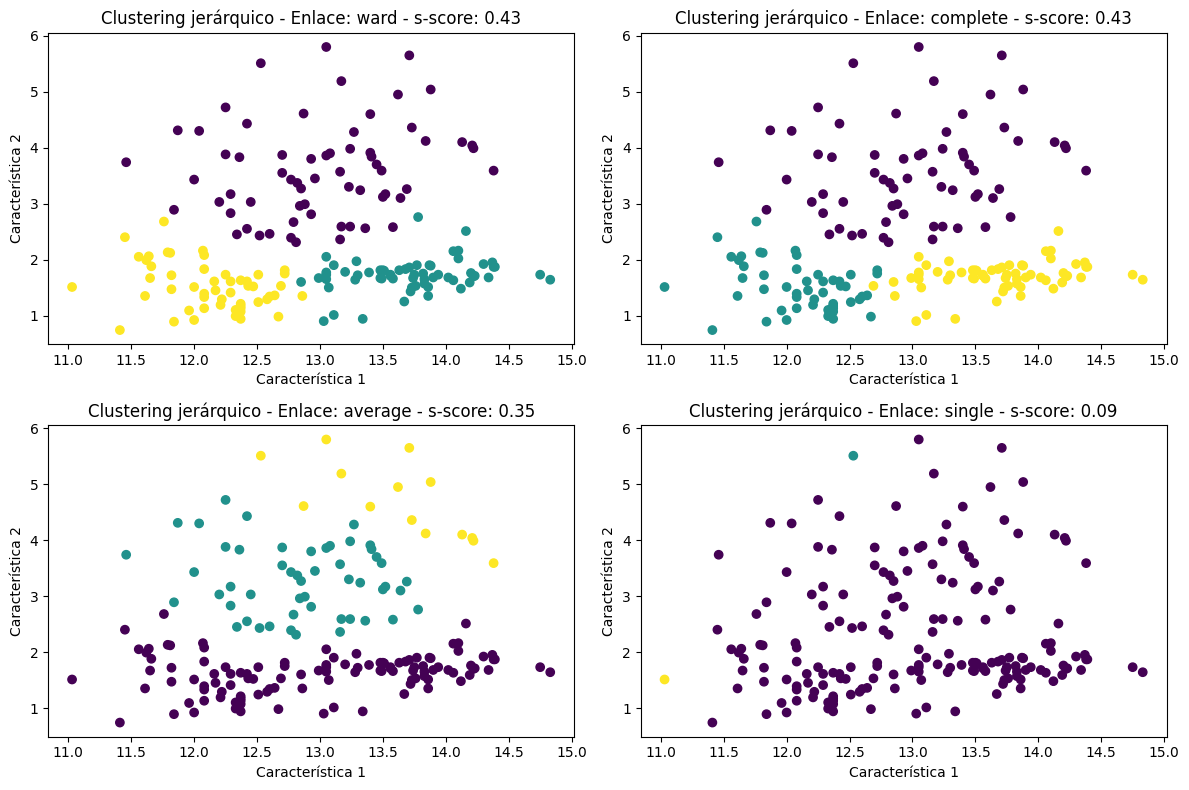

In [ ]:
# Realizar clustering jerárquico con diferentes métodos de enlace. Para ello creamos la lista
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(12, 8))
for i, method in enumerate(linkage_methods):
    # Realizar clustering jerárquico con el método de enlace actual
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = clustering.fit_predict(X)
    sc = silhouette_score(X, labels)

    # Graficar los puntos en un diagrama de dispersión para las dos primeras columnas
    plt.subplot(2, 2, i+1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title(f'Clustering jerárquico - Enlace: {method} - s-score: {sc:.2f}')

plt.tight_layout()
plt.show()

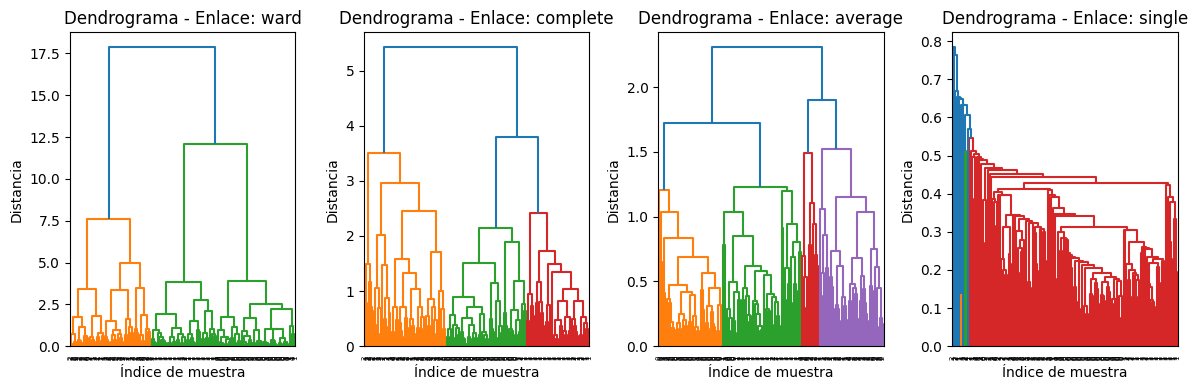

In [ ]:
#dendogramas

# Graficar los dendrogramas
plt.figure(figsize=(12, 4))
for i, method in enumerate(linkage_methods):
    # Realizar clustering jerárquico con el método de enlace actual
    Z = linkage(X, method)

    # Convertir la matriz de enlace a tipo float
    Z = Z.astype(float)

    # Graficar el dendrograma
    plt.subplot(1, 4, i+1)
    dendrogram(Z, labels=wine.target)
    plt.xlabel('Índice de muestra')
    plt.ylabel('Distancia')
    plt.title(f'Dendrograma - Enlace: {method}')

plt.tight_layout()
plt.show()

In [ ]:
#cluster con mejor método
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = clustering.fit_predict(X)

# Analizar los clusters obtenidos
for cluster in range(3):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_samples = wine.data[cluster_indices]
    cluster_target = wine.target[cluster_indices]
    cluster_name = wine.target_names[cluster]
    print(f'Cluster {cluster}: {cluster_name}')
    print(f'Número de muestras: {len(cluster_samples)}')
    print(f'Características más representativas: {np.mean(cluster_samples, axis=0)}')
    print(f'Etiquetas reales en el cluster: {np.unique(cluster_target)}')
    print('---')

Cluster 0: class_0
Número de muestras: 64
Características más representativas: [1.30007813e+01 3.60000000e+00 2.39906250e+00 2.06921875e+01
 9.87187500e+01 1.94906250e+00 1.36750000e+00 4.10625000e-01
 1.36593750e+00 5.77890623e+00 7.79531250e-01 2.20218750e+00
 6.24140625e+02]
Etiquetas reales en el cluster: [0 1 2]
---
Cluster 1: class_1
Número de muestras: 62
Características más representativas: [1.37237097e+01 1.72258065e+00 2.42838710e+00 1.78612903e+01
 1.04306452e+02 2.75790323e+00 2.76419355e+00 3.04193548e-01
 1.83387097e+00 5.82516129e+00 1.05403226e+00 2.98354839e+00
 1.04504839e+03]
Etiquetas reales en el cluster: [0 1 2]
---
Cluster 2: class_2
Número de muestras: 52
Características más representativas: [1.21382692e+01 1.51288462e+00 2.25269231e+00 1.99692308e+01
 9.55576923e+01 2.16923077e+00 1.96750000e+00 3.70576923e-01
 1.57807692e+00 3.25634615e+00 1.06126923e+00 2.67230769e+00
 5.42480769e+02]
Etiquetas reales en el cluster: [1 2]
---
